In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
df = pd.read_csv('G:/New 20121 Dekstop Files/thesis 2021/employee attrition dataset/employee_attrition.csv')

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df['Attrition'].replace({'Yes':1,'No':0},inplace = True)
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

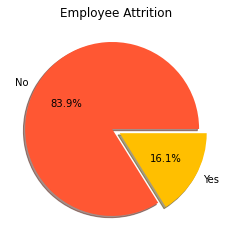

In [4]:
plt.pie(df.Attrition.value_counts(), labels = ['No','Yes'],colors = ['#FF5733','#FFBF00'],autopct='%1.1f%%',shadow=True, explode=(0.05, 0.05))
plt.title('Employee Attrition')
plt.show()

In [136]:
cat_features = list(df.select_dtypes(include=['object']).copy()) 
cat_features

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [137]:
# cat_features = list(['Department',
#  'EducationField',
#  'Gender',
#  'JobRole',
#  'MaritalStatus',
#  'Over18',
#  'OverTime'])
# cat_features

In [63]:
label_encoder =  preprocessing.LabelEncoder()
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['Over18'] = label_encoder.fit_transform(df['Over18'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

In [97]:
x = df.drop(['Attrition'],axis = 1)
y = df['Attrition']

In [98]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [99]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Univariate Selection

In [67]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [68]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = f_classif, k=34)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(34,'Score')) 

                    Features      Score
21                  OverTime  94.656457
27         TotalWorkingYears  44.252491
13                  JobLevel  43.215344
16             MaritalStatus  39.599763
31        YearsInCurrentRole  38.838303
17             MonthlyIncome  38.488819
0                        Age  38.175887
33      YearsWithCurrManager  36.712311
26          StockOptionLevel  28.140501
30            YearsAtCompany  27.001624
12            JobInvolvement  25.241985
15           JobSatisfaction  15.890004
9    EnvironmentSatisfaction  15.855209
4           DistanceFromHome   8.968277
14                   JobRole   6.649672
3                 Department   6.035877
29           WorkLifeBalance   6.026116
28     TrainingTimesLastYear   5.211646
2                  DailyRate   4.726640
24  RelationshipSatisfaction   3.095576
19        NumCompaniesWorked   2.782287
32   YearsSinceLastPromotion   1.602218
5                  Education   1.446308
10                    Gender   1.274587


F:\New_Anaconda_Inst_Loc\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 7 20 25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
F:\New_Anaconda_Inst_Loc\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [69]:
x.drop(['BusinessTravel'], axis =1 , inplace = True)

In [70]:
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,1,2,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,1,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,1,5,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,1,7,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,1,2061,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,1,2062,4,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,1,2064,2,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,1,2065,4,1,...,4,80,0,17,3,2,9,6,0,8


In [100]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42 )

In [101]:
# cat_features = np.where(xtrain.dtypes != np.float)[0]
# cat_features

In [102]:
# features =list(xtrain.columns)

In [124]:
model_cb = CatBoostClassifier(iterations=300,learning_rate=0.1,random_state = 2021)

In [125]:
model_cb.fit(xtrain, ytrain, cat_features= cat_features, plot= False, eval_set=(xtest, ytest))

0:	learn: 0.6244437	test: 0.6210615	best: 0.6210615 (0)	total: 20.8ms	remaining: 6.21s
1:	learn: 0.5732332	test: 0.5686007	best: 0.5686007 (1)	total: 58.7ms	remaining: 8.74s
2:	learn: 0.5254929	test: 0.5242014	best: 0.5242014 (2)	total: 87.2ms	remaining: 8.63s
3:	learn: 0.4985091	test: 0.4961061	best: 0.4961061 (3)	total: 120ms	remaining: 8.92s
4:	learn: 0.4703392	test: 0.4699135	best: 0.4699135 (4)	total: 163ms	remaining: 9.62s
5:	learn: 0.4450277	test: 0.4480856	best: 0.4480856 (5)	total: 198ms	remaining: 9.7s
6:	learn: 0.4352856	test: 0.4361154	best: 0.4361154 (6)	total: 214ms	remaining: 8.96s
7:	learn: 0.4224506	test: 0.4238741	best: 0.4238741 (7)	total: 259ms	remaining: 9.46s
8:	learn: 0.4061026	test: 0.4109482	best: 0.4109482 (8)	total: 300ms	remaining: 9.7s
9:	learn: 0.3901626	test: 0.4001267	best: 0.4001267 (9)	total: 357ms	remaining: 10.4s
10:	learn: 0.3791841	test: 0.3923238	best: 0.3923238 (10)	total: 395ms	remaining: 10.4s
11:	learn: 0.3658367	test: 0.3849969	best: 0.384996

95:	learn: 0.1540495	test: 0.3172199	best: 0.3172199 (95)	total: 4.08s	remaining: 8.67s
96:	learn: 0.1532947	test: 0.3176825	best: 0.3172199 (95)	total: 4.12s	remaining: 8.61s
97:	learn: 0.1528415	test: 0.3184300	best: 0.3172199 (95)	total: 4.16s	remaining: 8.58s
98:	learn: 0.1513228	test: 0.3185342	best: 0.3172199 (95)	total: 4.2s	remaining: 8.52s
99:	learn: 0.1502815	test: 0.3174913	best: 0.3172199 (95)	total: 4.24s	remaining: 8.48s
100:	learn: 0.1500363	test: 0.3174617	best: 0.3172199 (95)	total: 4.28s	remaining: 8.44s
101:	learn: 0.1471413	test: 0.3180469	best: 0.3172199 (95)	total: 4.32s	remaining: 8.38s
102:	learn: 0.1445776	test: 0.3168362	best: 0.3168362 (102)	total: 4.38s	remaining: 8.37s
103:	learn: 0.1427282	test: 0.3175215	best: 0.3168362 (102)	total: 4.41s	remaining: 8.31s
104:	learn: 0.1417155	test: 0.3181772	best: 0.3168362 (102)	total: 4.47s	remaining: 8.3s
105:	learn: 0.1413817	test: 0.3183792	best: 0.3168362 (102)	total: 4.51s	remaining: 8.25s
106:	learn: 0.1400187	te

190:	learn: 0.0667031	test: 0.3217879	best: 0.3157992 (133)	total: 8.2s	remaining: 4.68s
191:	learn: 0.0666480	test: 0.3220759	best: 0.3157992 (133)	total: 8.24s	remaining: 4.63s
192:	learn: 0.0659733	test: 0.3231849	best: 0.3157992 (133)	total: 8.29s	remaining: 4.59s
193:	learn: 0.0648618	test: 0.3254361	best: 0.3157992 (133)	total: 8.32s	remaining: 4.54s
194:	learn: 0.0644577	test: 0.3261582	best: 0.3157992 (133)	total: 8.38s	remaining: 4.51s
195:	learn: 0.0635850	test: 0.3275395	best: 0.3157992 (133)	total: 8.42s	remaining: 4.46s
196:	learn: 0.0629948	test: 0.3281566	best: 0.3157992 (133)	total: 8.47s	remaining: 4.43s
197:	learn: 0.0623476	test: 0.3278225	best: 0.3157992 (133)	total: 8.52s	remaining: 4.39s
198:	learn: 0.0617682	test: 0.3282689	best: 0.3157992 (133)	total: 8.55s	remaining: 4.34s
199:	learn: 0.0611315	test: 0.3293471	best: 0.3157992 (133)	total: 8.61s	remaining: 4.3s
200:	learn: 0.0605228	test: 0.3295862	best: 0.3157992 (133)	total: 8.64s	remaining: 4.26s
201:	learn: 

285:	learn: 0.0349528	test: 0.3329511	best: 0.3157992 (133)	total: 12.3s	remaining: 602ms
286:	learn: 0.0348173	test: 0.3328503	best: 0.3157992 (133)	total: 12.4s	remaining: 560ms
287:	learn: 0.0344762	test: 0.3329194	best: 0.3157992 (133)	total: 12.4s	remaining: 517ms
288:	learn: 0.0341958	test: 0.3326137	best: 0.3157992 (133)	total: 12.4s	remaining: 473ms
289:	learn: 0.0338988	test: 0.3331938	best: 0.3157992 (133)	total: 12.5s	remaining: 430ms
290:	learn: 0.0337144	test: 0.3327630	best: 0.3157992 (133)	total: 12.5s	remaining: 388ms
291:	learn: 0.0335952	test: 0.3324514	best: 0.3157992 (133)	total: 12.6s	remaining: 344ms
292:	learn: 0.0333123	test: 0.3317783	best: 0.3157992 (133)	total: 12.6s	remaining: 302ms
293:	learn: 0.0331756	test: 0.3323269	best: 0.3157992 (133)	total: 12.7s	remaining: 258ms
294:	learn: 0.0330327	test: 0.3325612	best: 0.3157992 (133)	total: 12.7s	remaining: 215ms
295:	learn: 0.0328790	test: 0.3331406	best: 0.3157992 (133)	total: 12.7s	remaining: 172ms
296:	learn

In [126]:
# Accuracy on Training 
predictions_train = model_cb.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = model_cb.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))

# # define the evaluation method
# print('\nRepeated 10-Folds Cross-Validation for Model Evaluation :\n')
# cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=1)
# # evaluate the model on the dataset
# n_scores = cross_val_score(model_cb, x, y, scoring='accuracy', cv=cv, n_jobs=-2)
# # report performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9693877551020408

Testing Accuracy :  0.891156462585034


In [127]:
print(classification_report(ytest,predictions_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       255
           1       0.73      0.28      0.41        39

    accuracy                           0.89       294
   macro avg       0.82      0.63      0.67       294
weighted avg       0.88      0.89      0.87       294



In [138]:
label_encoder =  preprocessing.LabelEncoder()
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['Over18'] = label_encoder.fit_transform(df['Over18'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

In [139]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=42 )

In [141]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(xtrain,ytrain)
predictions_train =classifier.predict(xtrain)
acc=accuracy_score(ytrain, predictions_train)
print('\nTraining Accuracy :', acc)
predictions_test = classifier.predict(xtest)
accc=accuracy_score(ytest, predictions_test)
print('\nTesting Accuracy :', accc)

# # define the evaluation method
# print('\nRepeated 5-Folds Cross-Validation for Model Evaluation :\n')
# cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=3, random_state=1)
# # evaluate the model on the dataset
# n_scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime